# comparison_ret_juan_wang_time

#### Juan Camilo Henao Londono - 21.05.2019
#### AG Guhr - Universitaet Duisburg-Essen

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

__tau__ = 1000

In [2]:
def months_days_list(folder_path, ticker, year):
    """
    Generate two lists with the string with the numbers of the months
    (from '01' to '12') and the days of the data to be analyzed.
    """
    days = []
    days_list = []
    months_list = []

    for i in range(1, 32):
        if (i < 10):
            days.append('0' + str(i))
        else:
            days.append(str(i))

    for m in range(1, 13):
        if (m < 10):
            months_list.append('0' + str(m))
        else:
            months_list.append(str(m))

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for month in months_list:
        days_month = []
        for d in days:
            for file in files:
                val_split = file.split('_')
                date = val_split[-1].split('.')[0]
                val = val_split[1] + val_split[2] + date
                if (val == '{}quotes{}{}{}'.format(ticker, year, month, d)):
                    days_month.append(d)
        days_list += [days_month]

    return(months_list, days_list)

In [9]:
def taq_self_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days):
    """
    Plot the average self- and cross-response during a year and the dayly
    cross-response contributions in a figure. The data is loaded from the
    cross response data results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: List of strings of the months to be analized
         (i.e ['07', '08', '09'])
        :param days: List of lists of strings with the days to be analized
         (i.e [['07', '08', '09'], ['01', '02']])
    """

    figure = plt.figure(figsize=(16, 9))

    plot_data_year_self_juan = np.zeros(__tau__)
    plot_data_year_self_wang = np.zeros(__tau__)
    plot_data_year_self_trans = np.zeros(__tau__)
    plot_data_year_cross_juan = np.zeros(__tau__)
    plot_data_year_cross_wang = np.zeros(__tau__)
    plot_data_year_cross_trans = np.zeros(__tau__)

    for month in months:

        plot_data_month_self_juan = np.zeros(__tau__)
        plot_data_month_self_wang = np.zeros(__tau__)
        plot_data_month_self_trans = np.zeros(__tau__)
        plot_data_month_cross_juan = np.zeros(__tau__)
        plot_data_month_cross_wang = np.zeros(__tau__)
        plot_data_month_cross_trans = np.zeros(__tau__)

        for i, day in enumerate(days[int(month) - 1]):

            load_day_self_juan = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{1}/taq_self_'
                + 'response_data_ret_juan/taq_self_response_data_ret_juan_{1}{2}{3}_{0}'
                + '.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
            load_day_self_wang = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{1}/taq_self_'
                + 'response_data_ret_wang/taq_self_response_data_ret_wang_{1}{2}{3}_{0}'
                + '.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
            load_day_self_trans = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{1}/taq_self_'
                + 'response_transactions_data_ret_wang/taq_self_response_transactions_data'
                + '_ret_wang_{1}{2}{3}_{0}.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
            load_day_cross_juan = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{2}/taq_cross_'
                + 'response_data_ret_juan/taq_cross_response_data_ret_juan_{2}{3}{4}_{0}i'
                + '_{1}j.pickle').split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))
            load_day_cross_wang = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{2}/taq_cross_'
                + 'response_data_ret_wang/taq_cross_response_data_ret_wang_{2}{3}{4}_{0}i_'
                + '{1}j.pickle')
                .split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))
            load_day_cross_trans = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{2}/taq_cross_'
                + 'response_transactions_data_ret_wang/taq_cross_response_transactions_data'
                + '_ret_wang_{2}{3}{4}_{0}i_{1}j.pickle')
                .split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))

            plot_data_month_self_juan += load_day_self_juan
            plot_data_month_self_wang += load_day_self_wang
            plot_data_month_self_trans += load_day_self_trans
            plot_data_month_cross_juan += load_day_cross_juan
            plot_data_month_cross_wang += load_day_cross_wang
            plot_data_month_cross_trans += load_day_cross_trans

        plot_data_month_self_juan = plot_data_month_self_juan / len(days[int(month) - 1])
        plot_data_month_self_wang = plot_data_month_self_wang / len(days[int(month) - 1])
        plot_data_month_self_trans = plot_data_month_self_trans / len(days[int(month) - 1])
        plot_data_month_cross_juan = plot_data_month_cross_juan / len(days[int(month) - 1])
        plot_data_month_cross_wang = plot_data_month_cross_wang / len(days[int(month) - 1])
        plot_data_month_cross_trans = plot_data_month_cross_trans / len(days[int(month) - 1])

        plot_data_year_self_juan += plot_data_month_self_juan
        plot_data_year_self_wang += plot_data_month_self_wang
        plot_data_year_self_trans += plot_data_month_self_trans
        plot_data_year_cross_juan += plot_data_month_cross_juan
        plot_data_year_cross_wang += plot_data_month_cross_wang
        plot_data_year_cross_trans += plot_data_month_cross_trans

    plot_data_year_self_juan = plot_data_year_self_juan / len(months)
    plot_data_year_self_wang = plot_data_year_self_wang / len(months)
    plot_data_year_self_trans = plot_data_year_self_trans / len(months)
    plot_data_year_cross_juan = plot_data_year_cross_juan / len(months)
    plot_data_year_cross_wang = plot_data_year_cross_wang / len(months)
    plot_data_year_cross_trans = plot_data_year_cross_trans / len(months)

    ax1 = plt.subplot(211)
    ax1.semilogx(plot_data_year_self_juan, '-', linewidth=5,
                 label=r'$R_{ii}\left(\tau\right)=\left\langle r_{i}\left(t,\tau\right)\cdot\varepsilon_{i}\left(t\right)\right\rangle _{t}$ (Juan)')
    ax1.semilogx(plot_data_year_self_wang, '-', linewidth=5,
                 label=r'$R_{ii}\left(\tau\right)=\left\langle r_{i}\left(t-1,\tau\right)\cdot\varepsilon_{i}\left(t\right)\right\rangle _{t}$ (Wang)')
    ax1.semilogx(plot_data_year_self_trans, '-', linewidth=5,
                 label=r'$R_{ii}\left(\tau\right)=\left\langle r_{i}\left(t,\tau\right)\cdot\varepsilon_{i}\left(t\right)\right\rangle _{transactions}$ (transactions)')

    ax1.set_xlabel(r'Time lag $[\tau]$', fontsize=10)
    ax1.set_ylabel(r'Self response $ R_{ii} (\tau) $', fontsize=10)
    ax1.legend(loc='best', fontsize=20)
    ax1.set_title('Self response - comparison', fontsize=10)
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax1.set_xlim(1, 1000)
    ax1.set_ylim(-1 * 10 ** -4, 5 * 10 ** -4)
    ax1.annotate(r'$r_i \left( t, \tau \right) = \frac{m_i \left( t + \tau \right) - m_i \left( t \right)}{m_i \left( t \right)}$',
                 xy=(1.2, 0.00024), fontsize=25)
    ax1.grid(True)
    plt.tight_layout()

    ax2 = plt.subplot(212)
    ax2.semilogx(plot_data_year_cross_juan, '-', linewidth=5,
                 label=r'$R_{ij}\left(\tau\right)=\left\langle r_{i}\left(t,\tau\right)\cdot\varepsilon_{j}\left(t\right)\right\rangle _{t}$ (Juan)')
    ax2.semilogx(plot_data_year_cross_wang, '-', linewidth=5,
                 label=r'$R_{ij}\left(\tau\right)=\left\langle r_{i}\left(t-1,\tau\right)\cdot\varepsilon_{j}\left(t\right)\right\rangle _{t}$ (Wang)')
    ax2.semilogx(plot_data_year_cross_trans, '-', linewidth=5,
                 label=r'$R_{ij}\left(\tau\right)=\left\langle r_{i}\left(t,\tau\right)\cdot\varepsilon_{j}\left(t\right)\right\rangle _{transactions}$ (transactions)')

    ax2.set_xlabel(r'Time lag $[\tau]$', fontsize=10)
    ax2.set_ylabel(r'Cross response $ R_{ij} (\tau) $', fontsize=10)
    ax2.legend(loc='best', fontsize=20)
    ax2.set_title('Cross response - comparison', fontsize=10)
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax2.set_xlim(1, 1000)
    ax2.set_ylim(-2 * 10 ** -5, 20 * 10 ** -5)
    ax2.grid(True)
    plt.tight_layout()


    return None

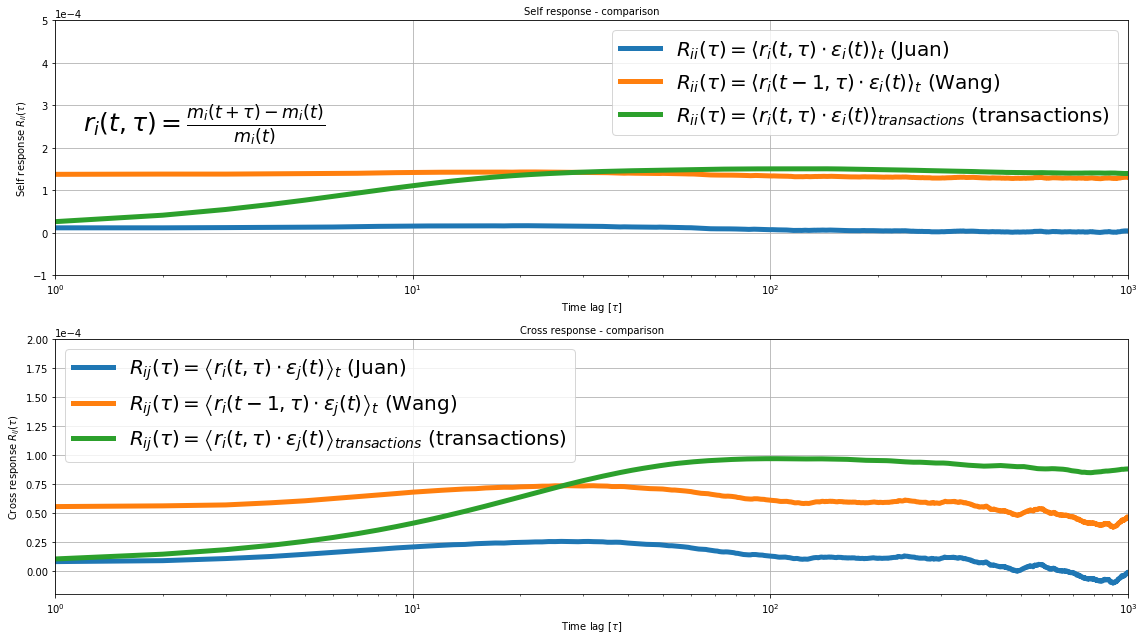

In [10]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
folder_path = '../../TAQ_2008/TAQ_py/'
months, days = months_days_list(folder_path, ticker_i, year)

taq_self_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days)